In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_reduced = pd.read_csv('Korea_Reduced_final_result.csv', encoding = 'cp949')
df_ALL = pd.read_csv('Korea_ALL_final_result.csv', encoding = 'cp949')

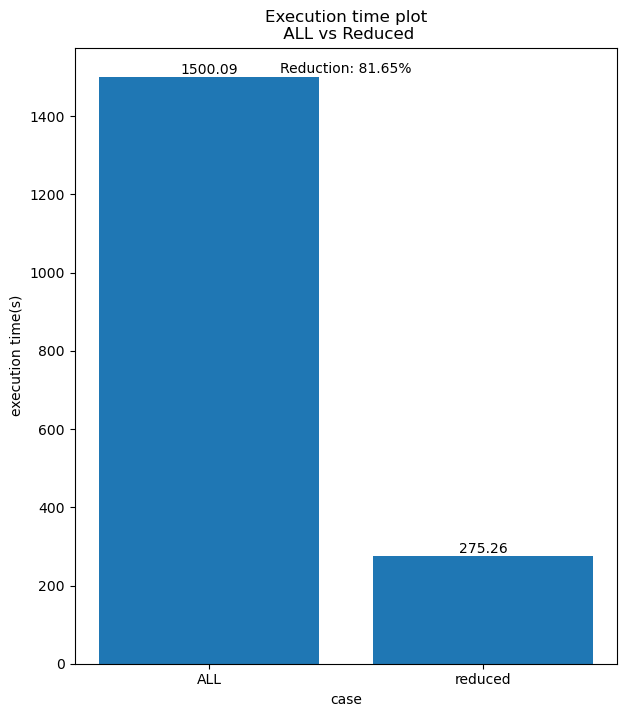

In [2]:
total_time_df = sum(df_ALL['finish_time'])
total_time_df_reduce= sum(df_reduced['finish_time'])

reduction_percentage = ((total_time_df - total_time_df_reduce) / total_time_df) * 100

data = {'종류': ['ALL', 'reduced'],
        '값': [total_time_df, total_time_df_reduce]}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(7, 8))  # 크기를 조절

bars = plt.bar(df_plot['종류'], df_plot['값'])
plt.xlabel("case")
plt.ylabel('execution time(s)')
plt.title('Execution time plot\n ALL vs Reduced')

# 막대 위에 값을 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# 감소 비율을 추가하고 위치 조정
plt.text(0.5, total_time_df + 3, f'Reduction: {round(reduction_percentage, 2)}%', ha='center', va='bottom')

plt.show()

In [3]:
# Specify the path to your text file
file_path = "cpu_ram_ALL_result.txt"

# Define column names based on your data format
columns = ["Record Time", "Total Reserved Memory", "Total Used Memory", "System Used Memory", "CPU mainthread time"]

# Read the text file into a list of lines
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse each line and extract values
data = []

Record_time = []
Total_Used_memory = []
CPU_rendering_time = []

for line in lines:
    values = line.split()
    data.append(values)

for i in range(len(data)):
    if len(data[i]) >= 3 and data[i][0] == "Record":
        Record_time.append(float(data[i][-2]))  # Extracting the time value and converting to float
    elif len(data[i]) >= 3 and data[i][0] == "Total" and data[i][1] == "Used":
        Total_Used_memory.append(float(data[i][-2]))  # Extracting the memory value and converting to float
    elif len(data[i]) >= 4 and data[i][0] == "CPU" and data[i][1] == "mainthread":
        CPU_rendering_time.append(float(data[i][-2]))  # Extracting the CPU rendering time value and converting to float

# Creating a DataFrame
df_CPU_RAM_ALL = pd.DataFrame({
    'Record Time': Record_time,
    'Total Used Memory': Total_Used_memory,
    'CPU Rendering Time': CPU_rendering_time
})
df_CPU_RAM_ALL

,Record Time,Total Used Memory,CPU Rendering Time
0,3.003842,0.0,0.0
1,3.049339,750.0,239.0
2,3.064790,766.0,25.0
3,3.103634,766.0,16.6
4,3.114590,769.0,30.9
...,...,...,...
506,33.065160,7758.0,97.2
507,33.162130,7775.0,97.2
508,33.258980,7791.0,98.1
509,33.357300,7808.0,97.5


In [4]:
# Specify the path to your text file
file_path = "cpu_ram_reduced_result.txt"


# Read the text file into a list of lines
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse each line and extract values
data = []

Record_time = []
Total_Used_memory = []
CPU_rendering_time = []

for line in lines:
    values = line.split()
    data.append(values)

for i in range(len(data)):
    if len(data[i]) >= 3 and data[i][0] == "Record":
        Record_time.append(float(data[i][-2]))  # Extracting the time value and converting to float
    elif len(data[i]) >= 3 and data[i][0] == "Total" and data[i][1] == "Used":
        Total_Used_memory.append(float(data[i][-2]))  # Extracting the memory value and converting to float
    elif len(data[i]) >= 4 and data[i][0] == "CPU" and data[i][1] == "mainthread":
        CPU_rendering_time.append(float(data[i][-2]))  # Extracting the CPU rendering time value and converting to float

# Creating a DataFrame
df_CPU_RAM_reduced = pd.DataFrame({
    'Record Time': Record_time,
    'Total Used Memory': Total_Used_memory,
    'CPU Rendering Time': CPU_rendering_time
})
df_CPU_RAM_reduced

,Record Time,Total Used Memory,CPU Rendering Time
0,2.814615,0.0,0.0
1,2.854058,677.0,96.2
2,2.874019,679.0,24.4
3,2.882113,679.0,10.5
4,2.898726,679.0,16.8
...,...,...,...
1266,32.734890,7035.0,35.2
1267,32.770240,7035.0,35.5
1268,33.235410,7052.0,464.4
1269,33.273910,7052.0,35.0


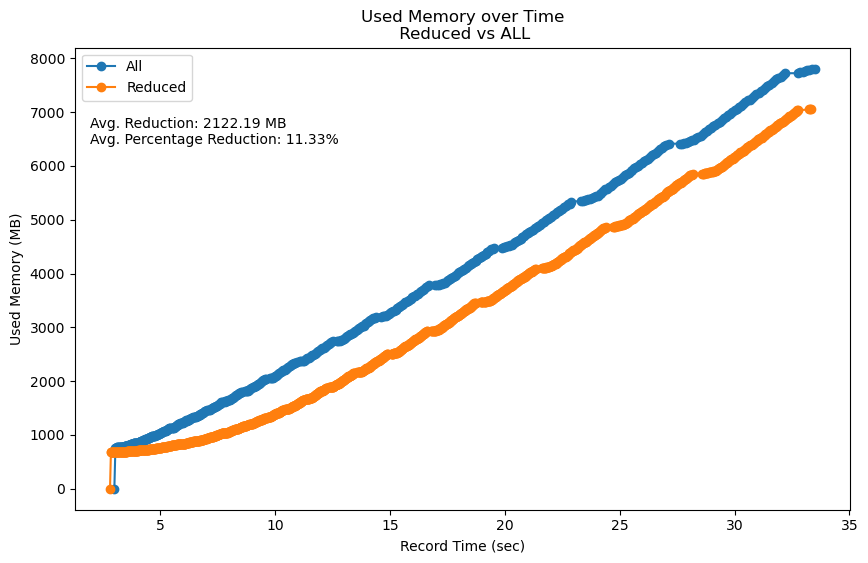

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded df_CPU_RAM_ALL and df_CPU_RAM_reduced from the provided code

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plotting Used Memory for ALL and Reduced
plt.plot(df_CPU_RAM_ALL['Record Time'], df_CPU_RAM_ALL['Total Used Memory'], label='All', marker='o')
plt.plot(df_CPU_RAM_reduced['Record Time'], df_CPU_RAM_reduced['Total Used Memory'], label='Reduced', marker='o')

# Calculating average reduction
average_reduction_memory = (df_CPU_RAM_ALL['Total Used Memory'] - df_CPU_RAM_reduced['Total Used Memory']).mean()
mean_all_cpuram = df_CPU_RAM_ALL['Total Used Memory'].mean()
mean_reduced_cpuram = df_CPU_RAM_reduced['Total Used Memory'].mean()
average_percentage_reduction_memory =  ( mean_all_cpuram - mean_reduced_cpuram ) / mean_all_cpuram * 100

# Calculating average percentage reduction
#average_percentage_reduction_memory = (average_reduction_memory / df_CPU_RAM_ALL['Total Used Memory'].mean()) * 100

# Adding labels and title
plt.xlabel('Record Time (sec)')
plt.ylabel('Used Memory (MB)')
plt.title('Used Memory over Time\n Reduced vs ALL')
plt.legend()

# Adding average reduction as text
plt.text(0.02, 0.85, f'Avg. Reduction: {average_reduction_memory:.2f} MB\nAvg. Percentage Reduction: {average_percentage_reduction_memory:.2f}%', ha='left', va='top',transform=plt.gca().transAxes)

# Displaying the plot
plt.show()


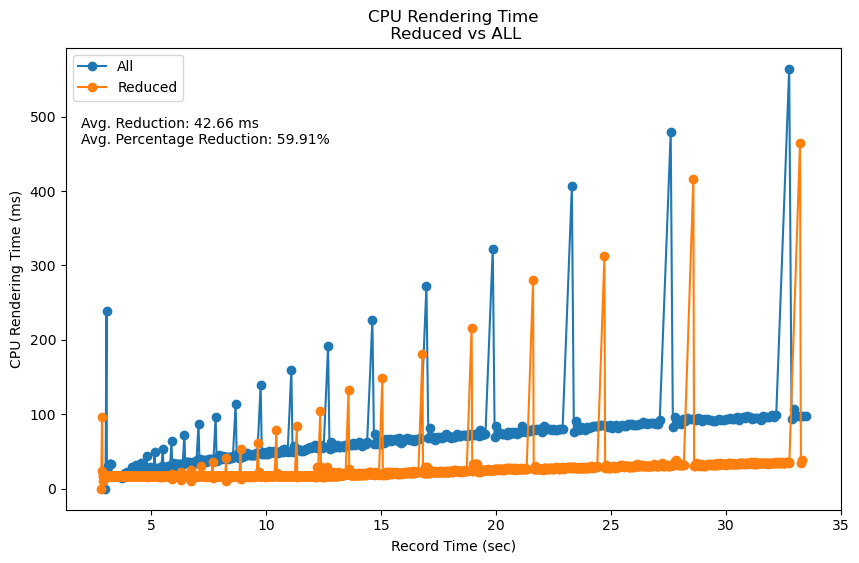

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded df_CPU_RAM_ALL and df_CPU_RAM_reduced from the provided code

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plotting CPU Rendering Time for ALL and Reduced
plt.plot(df_CPU_RAM_ALL['Record Time'], df_CPU_RAM_ALL['CPU Rendering Time'], label='All', marker='o')
plt.plot(df_CPU_RAM_reduced['Record Time'], df_CPU_RAM_reduced['CPU Rendering Time'], label='Reduced', marker='o')

# Calculating average reduction
average_reduction_ms = (df_CPU_RAM_ALL['CPU Rendering Time'] - df_CPU_RAM_reduced['CPU Rendering Time']).mean()
# Calculating average percentage reduction
average_percentage_reduction = (df_CPU_RAM_ALL['CPU Rendering Time'].mean() - df_CPU_RAM_reduced['CPU Rendering Time'].mean()) / df_CPU_RAM_ALL['CPU Rendering Time'].mean() * 100

# Adding labels and title
plt.xlabel('Record Time (sec)')
plt.ylabel('CPU Rendering Time (ms)')
plt.title('CPU Rendering Time\n Reduced vs ALL')
plt.legend()

# Adding average reduction as text
plt.text(0.02, 0.85, f'Avg. Reduction: {average_reduction_ms:.2f} ms\nAvg. Percentage Reduction: {average_percentage_reduction:0.2f}%',  ha='left', va='top',transform=plt.gca().transAxes)

# Displaying the plot
plt.show()
